<a href="https://colab.research.google.com/github/dhruv04938/ML-Project/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uber_dataset = pd.read_csv("/content/Uber Request Data.csv")
uber_dataset.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
uber_dataset.shape

(6745, 6)

In [ ]:
# Check the datatype of column
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
# Convert Request_timestamp to uniform datetime format
uber_dataset["Request timestamp"] = uber_dataset["Request timestamp"].apply(lambda x : pd.to_datetime(x))
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [ ]:
# Convert drop_timestamp to uniform format
uber_dataset["Drop timestamp"] = uber_dataset["Drop timestamp"].apply(lambda x : pd.to_datetime(x))
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [ ]:
# Check for null values
uber_dataset.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
uber_dataset.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [ ]:
# Check if the Driver id is null only for 'No Cars Available' status
uber_dataset[(uber_dataset.Status == 'No Cars Available') & (uber_dataset["Driver id"].isnull())].shape

(2650, 6)

In [ ]:
# Check if  drop timestamp is null only for 'No Cars Available' & 'Cancelled'
uber_dataset[((uber_dataset.Status == 'No Cars Available') | (uber_dataset.Status == 'Cancelled')) & (uber_dataset["Drop timestamp"].isnull())].shape

(3914, 6)

In [ ]:
# Extract the hour from requested timestamp
uber_dataset["Request hour"] = uber_dataset["Request timestamp"].dt.hour
uber_dataset.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


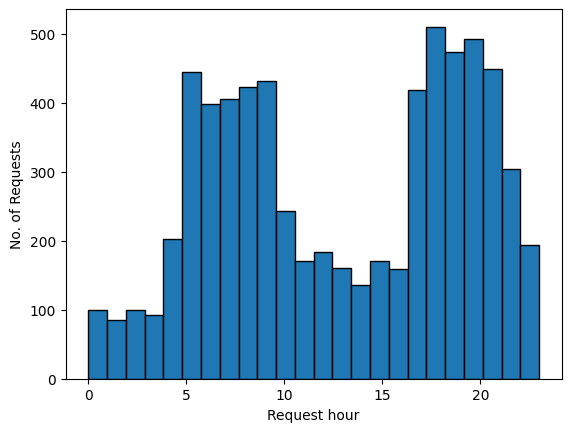

In [ ]:
plt.hist(uber_dataset["Request hour"],edgecolor = 'black',bins = 24)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()

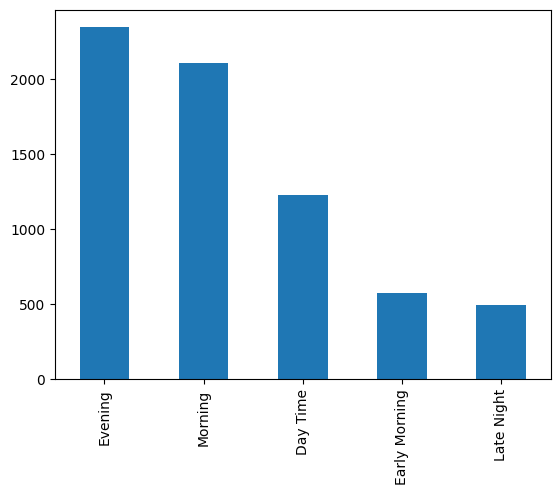

In [ ]:
# drive the time of the day into five categories
def time_period(x):
  if x < 5:
    return "Early Morning"
  elif 5 <= x < 10:
    return "Morning"
  elif 10 <= x < 17:
    return "Day Time"
  elif 17 <= x < 22:
    return "Evening"
  else:
    return "Late Night"

uber_dataset['Time slot'] = uber_dataset['Request hour'].apply(lambda x : time_period(x))
uber_dataset['Time slot'].value_counts().plot.bar()
plt.show()

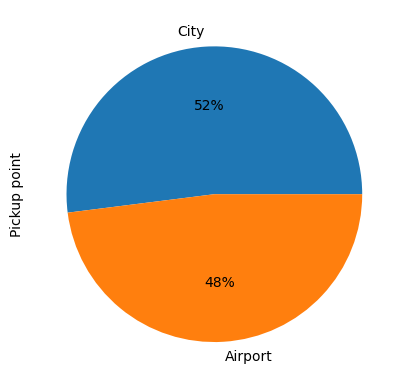

In [ ]:
uber_dataset["Pickup point"].value_counts().plot.pie(autopct = '%1.0f%%')
plt.show()

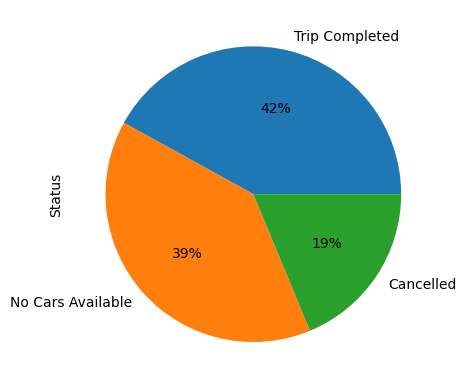

In [ ]:
uber_dataset["Status"].value_counts().plot.pie(autopct = '%1.0f%%')
plt.show()
# More than half of the requests are either cancelled or on wait due to unavailability of cabs

In [ ]:
uber_dataset["Count"] = 1
uber_city = uber_dataset[uber_dataset["Pickup point"] == "City"]
uber_airport = uber_dataset[uber_dataset["Pickup point"] == "Airport"]

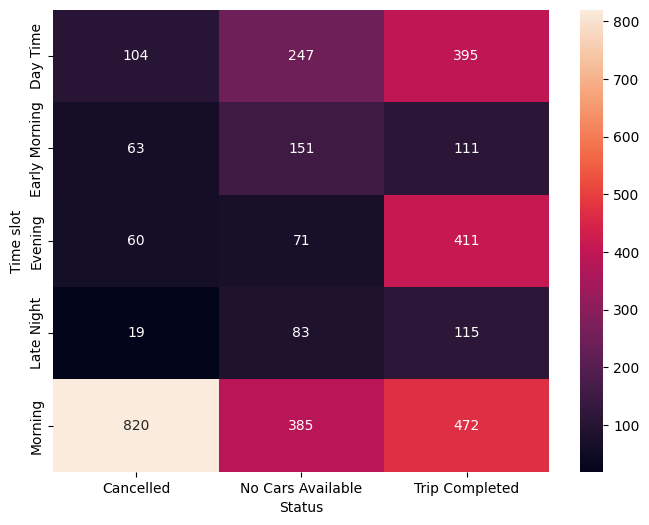

In [ ]:
# Availability matrix for requests with Pickup point as City
pivot_city = pd.pivot_table(uber_city,index = "Time slot" , columns = "Status" , values = "Count" , aggfunc = np.sum)
plt.figure(figsize = [8,6])
hm = sns.heatmap(data = pivot_city, annot = True, fmt = 'g')
plt.show()

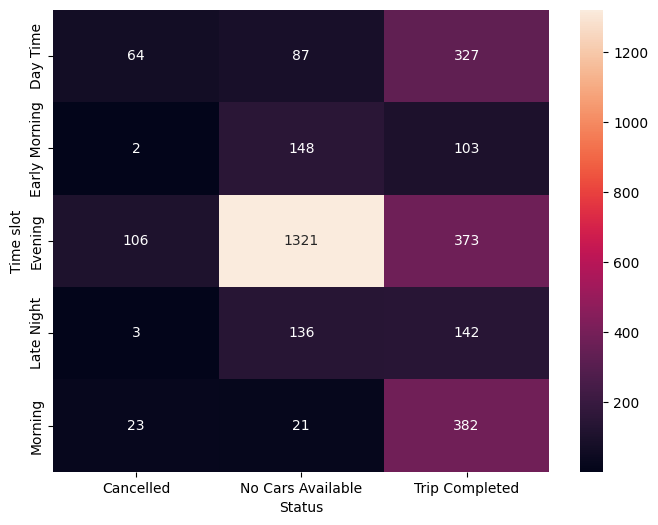

In [ ]:
# Availability matrix for requests with pickup points as Airport
pivot_airport = pd.pivot_table(uber_airport,index = "Time slot" , columns = "Status" , values = "Count" , aggfunc = np.sum)
plt.figure(figsize = [8,6])
hm = sns.heatmap(data = pivot_airport, annot = True, fmt = 'g')
plt.show()